In [121]:
import csv
import pandas as pd
import numpy as np

from PIL import Image
import time
import matplotlib.pyplot as plt

In [122]:
companies = []
with open("Forbes-2021.csv", "r", encoding="ISO-8859-1") as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # skip header
    for row in csvreader:
        companies.append(row)


In [123]:
companies[:3]

[['1', 'ICBC', 'China', '$190.5 B', '$45.8 B', '$4,914.7 B', '$249.5 B'],
 ['2',
  'JPMorgan Chase',
  'United States',
  '$136.2 B',
  '$40.4 B',
  '$3,689.3 B',
  '$464.8 B'],
 ['3',
  'Berkshire Hathaway',
  'United States',
  '$245.5 B',
  '$42.5 B',
  '$873.7 B',
  '$624.4 B']]

In [12]:
import json

# read file
with open('logo_links.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

In [13]:
len(obj)

1323

In [124]:
obj[1]

{'wiki_url': 'https://en.wikipedia.org/wiki/Bank_of_China',
 'company_name': 'Bank of China',
 'wiki_name': 'Bank of China Limited',
 'image_urls': ['https://upload.wikimedia.org/wikipedia/en/thumb/7/72/Bank_of_China.svg/250px-Bank_of_China.svg.png'],
 'images': [{'url': 'https://upload.wikimedia.org/wikipedia/en/thumb/7/72/Bank_of_China.svg/250px-Bank_of_China.svg.png',
   'path': 'full/77e7a46e67a34b4e1f8c72b2708f209f882861a6.jpg',
   'checksum': 'ed7bc2b924063431e250707d914bb8d9',
   'status': 'downloaded'}]}

In [15]:
# %%javascript
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }

In [1]:
fig, axs = plt.subplots(figsize=[15, 750], nrows=300, ncols=5)
n_start = 0
n_end = 1324
axs = np.ravel(axs)
for i, logo in enumerate(obj[n_start:n_end]):
    axs[i].imshow(Image.open(logo['images'][0]['path']))
    axs[i].set_title(logo['company_name'], fontname="Courier New")
    axs[i].xaxis.set_visible(False)
    axs[i].yaxis.set_visible(False)
#     sz.append(img.size)


NameError: name 'plt' is not defined

In [126]:
to_drop_black = [
    "JPMorgan Chase", "Sony", "BlackRock", "Volvo Group",
    "Panasonic", "Kering", "Ericsson", "Macquarie Group",
    "Norfolk Southern", "BASF", "Activision Blizzard", "Adidas",
    "Nissan Motor", "Advanced Micro Devices", "Renault", "BOE Technology Group",
    "Simon Property Group", "Assa Abloy", "Coal India", "T Rowe Price",
    "Marriott International", "L Brands", "Western Digital", "DaVita",
    "Autodesk", "Arrow Electronics", "Agilent Technologies", "Asustek Computer",
    "IDEXX Laboratories", "Zebra Technologies", "Bancolombia", "First Quantum Minerals",
    "Citrix Systems", "CrowdStrike", "DocuSign", "Palantir Technologies",
    "AECOM Technology", "CoStar Group", "JD Sports Fashion", "Marvell Technology Group",
    "Frost Bankers", "Nanto Bank", "Toll Brothers", "Unity Software"
]

to_drop_building = [
    "China State Construction Engineering", "China Railway Construction", "Westinghouse Air Brake Technologies",
    "Nomura Research Institute", "Hotai Motor", "Taiwan Cement", "Chang Hwa Bank",
    "China Railway Signal & Communication", "DGB Financial Group"
]

to_drop_all = to_drop_black.append(to_drop_building)

In [108]:
obj_cleaned = [item for item in obj if item['company_name'] not in to_drop_all]
obj_cleaned = [item for item in obj_cleaned if np.all(np.array(Image.open(item['images'][0]['path']).size) <= 250)]

In [109]:
sz = [Image.open(logo['images'][0]['path']).size for logo in obj_cleaned]

In [110]:
max_sz = np.max(sz, axis=0)

In [111]:
max_sz

array([250, 250])

In [127]:
all_img = np.ones([max_sz[1], max_sz[0], 3, len(obj_cleaned)])

In [128]:
for idx, item in enumerate(obj_cleaned):
    tmp_img = Image.open(item['images'][0]['path'])
    tmp_sz = tmp_img.size
    row_start = int(np.floor((max_sz[1] - tmp_sz[1]) / 2))
    row_end = row_start + tmp_sz[1]
    col_start = int(np.floor((max_sz[0] - tmp_sz[0]) / 2))
    col_end = col_start + tmp_sz[0]
    print(tmp_sz, row_start, row_end, col_start, col_end)
    all_img[row_start:row_end, col_start:col_end, :, idx] = np.array(tmp_img)

(250, 33) 108 141 0 250
(250, 75) 87 162 0 250
(220, 39) 105 144 15 235
(250, 25) 112 137 0 250
(250, 46) 102 148 0 250
(250, 19) 115 134 0 250
(220, 59) 95 154 15 235
(200, 60) 95 155 25 225
(220, 46) 102 148 15 235
(250, 53) 98 151 0 250
(220, 17) 116 133 15 235
(150, 98) 76 174 50 200
(220, 54) 98 152 15 235
(220, 53) 98 151 15 235
(220, 49) 100 149 15 235
(150, 162) 44 206 50 200
(220, 55) 97 152 15 235
(220, 78) 86 164 15 235
(220, 34) 108 142 15 235
(125, 125) 62 187 62 187
(220, 42) 104 146 15 235
(200, 34) 108 142 25 225
(250, 56) 97 153 0 250
(200, 84) 83 167 25 225
(220, 32) 109 141 15 235
(250, 30) 110 140 0 250
(220, 59) 95 154 15 235
(220, 68) 91 159 15 235
(125, 112) 69 181 62 187
(200, 98) 76 174 25 225
(100, 103) 73 176 75 175
(150, 150) 50 200 50 200
(150, 150) 50 200 50 200
(220, 74) 88 162 15 235
(200, 73) 88 161 25 225
(220, 40) 105 145 15 235
(150, 150) 50 200 50 200
(220, 35) 107 142 15 235
(220, 52) 99 151 15 235
(220, 236) 7 243 15 235
(220, 81) 84 165 15 235
(2

(220, 36) 107 143 15 235
(220, 64) 93 157 15 235
(220, 69) 90 159 15 235
(220, 28) 111 139 15 235
(220, 132) 59 191 15 235
(200, 83) 83 166 25 225
(220, 97) 76 173 15 235
(220, 58) 96 154 15 235
(220, 34) 108 142 15 235
(220, 30) 110 140 15 235
(220, 13) 118 131 15 235
(250, 50) 100 150 0 250
(200, 110) 70 180 25 225
(220, 55) 97 152 15 235
(220, 62) 94 156 15 235
(220, 60) 95 155 15 235
(250, 113) 68 181 0 250
(250, 30) 110 140 0 250
(220, 78) 86 164 15 235
(220, 58) 96 154 15 235
(220, 40) 105 145 15 235
(220, 64) 93 157 15 235
(250, 51) 99 150 0 250
(220, 37) 106 143 15 235
(220, 37) 106 143 15 235
(220, 59) 95 154 15 235
(150, 155) 47 202 50 200
(220, 57) 96 153 15 235
(200, 37) 106 143 25 225
(175, 42) 104 146 37 212
(200, 45) 102 147 25 225
(220, 47) 101 148 15 235
(220, 71) 89 160 15 235
(250, 56) 97 153 0 250
(220, 39) 105 144 15 235
(220, 107) 71 178 15 235
(220, 37) 106 143 15 235
(150, 89) 80 169 50 200
(200, 55) 97 152 25 225
(220, 60) 95 155 15 235
(220, 156) 47 203 15 235

(210, 35) 107 142 20 230
(220, 49) 100 149 15 235
(250, 66) 92 158 0 250
(220, 78) 86 164 15 235
(250, 50) 100 150 0 250
(200, 179) 35 214 25 225
(220, 160) 45 205 15 235
(150, 167) 41 208 50 200
(220, 112) 69 181 15 235
(220, 83) 83 166 15 235
(250, 95) 77 172 0 250
(170, 140) 55 195 40 210
(220, 52) 99 151 15 235
(220, 58) 96 154 15 235
(170, 89) 80 169 40 210
(200, 73) 88 161 25 225
(145, 45) 102 147 52 197
(220, 86) 82 168 15 235
(220, 220) 15 235 15 235
(219, 65) 92 157 15 234
(220, 60) 95 155 15 235
(220, 103) 73 176 15 235
(250, 33) 108 141 0 250
(220, 43) 103 146 15 235
(220, 67) 91 158 15 235
(149, 149) 50 199 50 199
(220, 67) 91 158 15 235
(200, 81) 84 165 25 225
(200, 40) 105 145 25 225
(200, 71) 89 160 25 225
(83, 49) 100 149 83 166
(220, 59) 95 154 15 235
(150, 149) 50 199 50 200
(219, 57) 96 153 15 234
(200, 143) 53 196 25 225
(220, 37) 106 143 15 235
(220, 32) 109 141 15 235
(220, 220) 15 235 15 235
(200, 84) 83 167 25 225
(220, 67) 91 158 15 235
(220, 80) 85 165 15 235


(230, 33) 108 141 10 240
(150, 37) 106 143 50 200
(191, 30) 110 140 29 220
(230, 66) 92 158 10 240
(205, 48) 101 149 22 227
(220, 156) 47 203 15 235
(250, 63) 93 156 0 250
(220, 71) 89 160 15 235
(220, 120) 65 185 15 235
(220, 42) 104 146 15 235
(216, 42) 104 146 17 233
(220, 116) 67 183 15 235
(220, 51) 99 150 15 235
(220, 86) 82 168 15 235
(250, 22) 114 136 0 250
(220, 49) 100 149 15 235
(180, 71) 89 160 35 215
(220, 25) 112 137 15 235
(200, 95) 77 172 25 225
(148, 48) 101 149 51 199
(220, 63) 93 156 15 235
(200, 37) 106 143 25 225
(220, 75) 87 162 15 235
(220, 220) 15 235 15 235
(220, 55) 97 152 15 235
(220, 91) 79 170 15 235
(220, 49) 100 149 15 235
(220, 39) 105 144 15 235
(220, 43) 103 146 15 235
(187, 50) 100 150 31 218
(220, 48) 101 149 15 235
(220, 176) 37 213 15 235
(220, 32) 109 141 15 235
(220, 74) 88 162 15 235
(220, 46) 102 148 15 235
(250, 180) 35 215 0 250
(220, 47) 101 148 15 235
(220, 220) 15 235 15 235
(220, 41) 104 145 15 235
(220, 71) 89 160 15 235
(192, 40) 105 14

In [129]:
all_img.shape

(250, 250, 3, 1230)

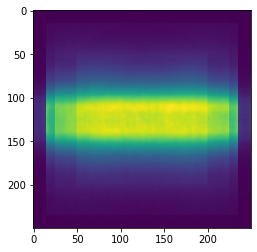

In [130]:
plt.imshow(np.mean(np.mean(all_img, axis=3), axis=2))

In [131]:
sz_list = np.array([list(s) for s in sz])

(array([  1.,   1.,   1.,   1.,  16.,   3.,  24.,   8.,   9.,  75.,  13.,
         10.,  30.,  11., 155.,  12., 666.,  21.,   6., 167.]),
 array([ 61.  ,  70.45,  79.9 ,  89.35,  98.8 , 108.25, 117.7 , 127.15,
        136.6 , 146.05, 155.5 , 164.95, 174.4 , 183.85, 193.3 , 202.75,
        212.2 , 221.65, 231.1 , 240.55, 250.  ]),
 <BarContainer object of 20 artists>)

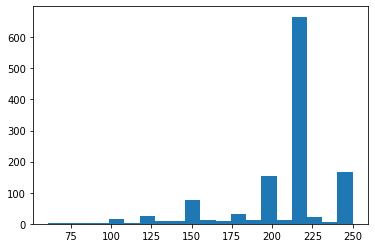

In [132]:
plt.hist(sz_list[:, 0], bins=20)

(array([ 22., 130., 202., 203., 151., 113.,  68.,  70.,  57.,  37.,  28.,
         36.,  30.,  16.,  15.,  13.,   7.,  23.,   3.,   6.]),
 array([ 13.  ,  24.85,  36.7 ,  48.55,  60.4 ,  72.25,  84.1 ,  95.95,
        107.8 , 119.65, 131.5 , 143.35, 155.2 , 167.05, 178.9 , 190.75,
        202.6 , 214.45, 226.3 , 238.15, 250.  ]),
 <BarContainer object of 20 artists>)

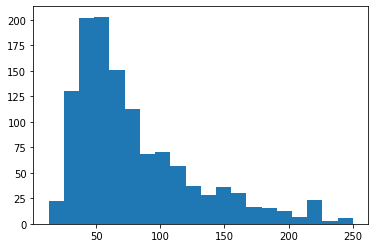

In [133]:
plt.hist(sz_list[:, 1], bins=20)